In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import sys, os

In [4]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

#Set manifest path when outside of AWS
drive_path = '/data/dynamic-brain-workshop/brain_observatory_cache/'
manifest_file = os.path.join(drive_path,'brain_observatory_manifest.json')
print manifest_file

boc = BrainObservatoryCache(manifest_file=manifest_file)

/data/dynamic-brain-workshop/brain_observatory_cache/brain_observatory_manifest.json


Here we will start with a cell_specimen_id. Alternately, you might choose an experiment you're interested in and start with an experiment_id. 

In [8]:
cell_specimen_id = 588875049

Let's find all of the ophys sessions collected with this cell

In [9]:
boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id])

[{'acquisition_age_days': 80,
  'cre_line': u'Rorb-IRES2-Cre',
  'donor_name': u'232623',
  'experiment_container_id': 511500480,
  'id': 510390912,
  'imaging_depth': 275,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Rorb-IRES2-Cre;Camk2a-tTA;Ai93-232623',
  'targeted_structure': u'VISal'},
 {'acquisition_age_days': 82,
  'cre_line': u'Rorb-IRES2-Cre',
  'donor_name': u'232623',
  'experiment_container_id': 511500480,
  'id': 510524416,
  'imaging_depth': 275,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_C',
  'specimen_name': u'Rorb-IRES2-Cre;Camk2a-tTA;Ai93-232623',
  'targeted_structure': u'VISal'},
 {'acquisition_age_days': 86,
  'cre_line': u'Rorb-IRES2-Cre',
  'donor_name': u'232623',
  'experiment_container_id': 511500480,
  'id': 511458599,
  'imaging_depth': 275,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
  'specimen_name': u'Rorb-IRES2-Cre;Camk2a-tTA;Ai

There are three experiment sessions for this cell.  They are all collected from the same mouse (donor_name, specimen_name) with the same cre line and reporter, from the same targeted structure (ie. visual area) and imaging depth. They were collected on different days (acquisition age) using different stimuli (session_type).  They all have a common <b> experiment_container_id</b> but each session has it's own <b>id</b>.

To get to the data for a given session, you must know the <b>id</b> for that session. For example, we want to id for our cell when natural scenes were presented.

In [11]:
session_id = boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id], stimuli=['natural_scenes'])[0]['id']
print session_id

511458599


If you are starting with an experiment id instead of a cell id:

In [43]:
expt_id = 553568029

In [45]:
boc.get_ophys_experiments(experiment_container_ids=[expt_id])

[{'acquisition_age_days': 104,
  'cre_line': u'Rorb-IRES2-Cre',
  'donor_name': u'268133',
  'experiment_container_id': 553568029,
  'id': 554284637,
  'imaging_depth': 275,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_C2',
  'specimen_name': u'Rorb-IRES2-Cre;Camk2a-tTA;Ai93-268133',
  'targeted_structure': u'VISrl'},
 {'acquisition_age_days': 103,
  'cre_line': u'Rorb-IRES2-Cre',
  'donor_name': u'268133',
  'experiment_container_id': 553568029,
  'id': 554021353,
  'imaging_depth': 275,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
  'specimen_name': u'Rorb-IRES2-Cre;Camk2a-tTA;Ai93-268133',
  'targeted_structure': u'VISrl'},
 {'acquisition_age_days': 99,
  'cre_line': u'Rorb-IRES2-Cre',
  'donor_name': u'268133',
  'experiment_container_id': 553568029,
  'id': 553568031,
  'imaging_depth': 275,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Rorb-IRES2-Cre;Camk2a-tTA

If you don't have a specific cell or experiment container in mind, you can also get session ids using targeted structures, experiment container ids, stimuli, Cre lines, imaging depth, etc.

In [12]:
boc.get_ophys_experiments(targeted_structures=['VISl'], stimuli=['drifting_gratings'], cre_lines=['Nr5a1-Cre'])

[{'acquisition_age_days': 108,
  'cre_line': u'Nr5a1-Cre',
  'donor_name': u'271727',
  'experiment_container_id': 558476280,
  'id': 558476282,
  'imaging_depth': 350,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Nr5a1-Cre;Camk2a-tTA;Ai93-271727',
  'targeted_structure': u'VISl'},
 {'acquisition_age_days': 95,
  'cre_line': u'Nr5a1-Cre',
  'donor_name': u'271729',
  'experiment_container_id': 554219902,
  'id': 556321897,
  'imaging_depth': 350,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Nr5a1-Cre;Camk2a-tTA;Ai93-271729',
  'targeted_structure': u'VISl'},
 {'acquisition_age_days': 128,
  'cre_line': u'Nr5a1-Cre',
  'donor_name': u'261967',
  'experiment_container_id': 550922597,
  'id': 552956934,
  'imaging_depth': 350,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Nr5a1-Cre;Camk2a-tTA;Ai93-261967',
  'targeted_struct

To find the possible stimuli, targeted structures, cre lines:

In [13]:
boc.get_all_cre_lines()

[u'Cux2-CreERT2',
 u'Emx1-IRES-Cre',
 u'Nr5a1-Cre',
 u'Rbp4-Cre_KL100',
 u'Rorb-IRES2-Cre',
 u'Scnn1a-Tg3-Cre']

In [14]:
boc.get_all_targeted_structures()

[u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']

In [15]:
boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

To get the data from this session we identified, we use **get_ophys_experiment_data** and pass the session_id. This creates an object that has many functions to extract the data we want

In [16]:
data_set = boc.get_ophys_experiment_data(session_id)

To see the functions, try tab-complete after **data_set.**

In [ ]:
data_set.

### Maximum projection of the calcium movie

(512, 512)


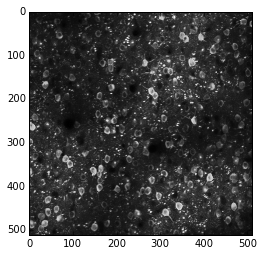

In [60]:
max_proj = data_set.get_max_projection()
plt.imshow(max_proj, cmap='gray')
print max_proj.shape

### List of cell specimen ids in this session

In [20]:
cell_ids = data_set.get_cell_specimen_ids()
print cell_ids

[517401085 517400722 517400892 517401152 517401372 588877006 588876846
 517401221 517401380 517400988 517401419 517400926 588875049 517401215
 517401236 517400812 517401005 517401218 517401362 588877360 517400773
 517401392 517401201 588874289 517401064 517401096 517401070 517400818
 588874267 517401040 517401338 517401244 517401348 517401198 517401416
 517400835 517400793 517401343 588877517 517401388 517401207 517401303
 517400806 517400799 517401212 517400698 517401088 517400692 517400968
 517400695 517401401 517401232 517401224 517401020 517401025 517400701
 588877248 517400686 517400689 517400707 517401181 517401010 517400941
 517401035 588877213 517401045 517401076 517401176 517400916 517401398
 517400960]


In [21]:
np.where(cell_ids == cell_specimen_id)

(array([12]),)

In [19]:
data_set.get_cell_specimen_indices(cell_specimen_ids=[cell_specimen_id])

[12]

### Raw fluorescence traces with neuropil subtraction performed

In [22]:
timestamps, fluorescence = data_set.get_corrected_fluorescence_traces()

In [23]:
print fluorescence.shape
print "Number of cells:", len(cell_ids)
print "Number of time poits:", len(timestamps)

(71, 114101)
Number of cells: 71
Number of time poits: 114101


### DF/F traces

In [24]:
timestamps, dff = data_set.get_dff_traces()

In [25]:
print dff.shape

(71, 114101)


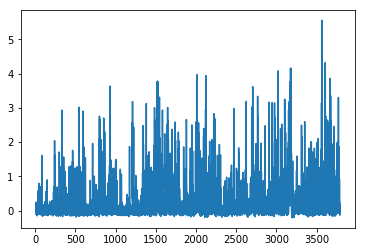

In [26]:
plt.plot(timestamps, dff[12,:])

### ROI masks

In [27]:
roi_masks = data_set.get_roi_mask_array()

In [28]:
print roi_masks.shape

(71, 512, 512)


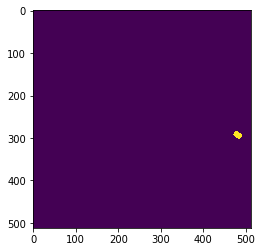

In [29]:
plt.imshow(roi_masks[12,:,:])

### Stimulus table and stimulus template

In [30]:
stim_table = data_set.get_stimulus_table('natural_scenes')

In [31]:
stim_table.head()

,frame,start,end
0,3,16122,16130
1,16,16130,16137
2,94,16138,16145
3,24,16145,16152
4,41,16153,16160


In [32]:
stim_template = data_set.get_stimulus_template('natural_scenes')

In [33]:
stim_template.shape

(118, 918, 1174)

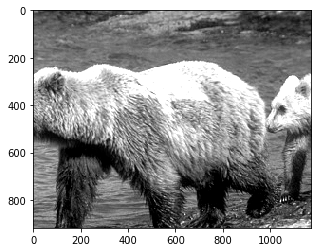

In [34]:
plt.imshow(stim_template[0,:,:], cmap='gray')

### Mouse running speed

In [41]:
running_speed, timestamps = data_set.get_running_speed()

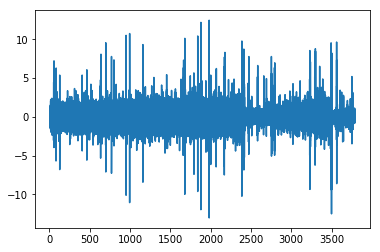

In [42]:
plt.plot(timestamps, running_speed)

This animal doesn't appear to have done much running

### Eye position

In [46]:
temp = data_set.get_pupil_location()

NoEyeTrackingException: No eye tracking for this experiment.

## Cell Specimens

**Cell_specimens** is a database that contains many useful pre-computed metrics.

In [35]:
cell_specimens = pd.DataFrame(boc.get_cell_specimens())

In [36]:
cell_specimens.head()

,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,g_osi_dg,g_osi_sg,...,specimen_id,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
0,False,VISpm,517394847,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,0.852081,511498500,False,0.468690,0.275754,NaN,...,503292439,0.348821,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
1,False,VISpm,517394850,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,NaN,511498500,False,0.730537,0.342070,NaN,...,503292439,0.298012,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
2,False,VISpm,517394854,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,0.692137,511498500,False,0.319382,0.215510,NaN,...,503292439,0.380637,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3,False,VISpm,517394858,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,NaN,511498500,False,NaN,NaN,0.76123,...,503292439,NaN,0.4655,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
4,False,VISpm,517394862,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,NaN,511498500,False,0.391861,0.742900,NaN,...,503292439,0.330543,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


It contains data for every cell in the database.

In [37]:
print len(cell_specimens)

39796


And it contains many derived metrics

In [38]:
print cell_specimens.keys()

Index([u'all_stim', u'area', u'cell_specimen_id', u'donor_full_genotype',
       u'dsi_dg', u'experiment_container_id', u'failed_experiment_container',
       u'g_dsi_dg', u'g_osi_dg', u'g_osi_sg', u'image_sel_ns',
       u'imaging_depth', u'osi_dg', u'osi_sg', u'p_dg', u'p_ns',
       u'p_run_mod_dg', u'p_run_mod_ns', u'p_run_mod_sg', u'p_sg',
       u'peak_dff_dg', u'peak_dff_ns', u'peak_dff_sg', u'pref_dir_dg',
       u'pref_image_ns', u'pref_ori_sg', u'pref_phase_sg', u'pref_sf_sg',
       u'pref_tf_dg', u'reliability_dg', u'reliability_nm1_a',
       u'reliability_nm1_b', u'reliability_nm1_c', u'reliability_nm2',
       u'reliability_nm3', u'reliability_ns', u'reliability_sg',
       u'rf_area_off_lsn', u'rf_area_on_lsn', u'rf_center_off_x_lsn',
       u'rf_center_off_y_lsn', u'rf_center_on_x_lsn', u'rf_center_on_y_lsn',
       u'rf_chi2_lsn', u'rf_distance_lsn', u'rf_overlap_index_lsn',
       u'run_mod_dg', u'run_mod_ns', u'run_mod_sg', u'sfdi_sg', u'specimen_id',
       u'tfdi_

## Get all NWB files

Downloading NWB files can be a bottleneck in using the Brain Observatory data. But, once you download a specific NWB file, it will stay on your computer, and the SDK will find it (provided you don't move it around).  If you are using the Brain Observatory for ongoing work and don't want to deal with downloading individual datasets, you can download all NWB files in one fell swoop.  One slow fell swoop.

boc.get_ophys_experiment_data()

When you pass this function a session ID, it will download the NWB file for that session.  When you leave the parantheses empty, it will download **ALL** the NWB files. There are currently 597 NWB files in the dataset (with many more coming online in October!) so it will take some time if you want all the files (eg. days). When you are working in AWS, all of these files have already been downloaded, but if you are setting up on your own environment, be aware that this download can take some time.  